In [ ]:
import sys
# add your src path to the system path so that it will search there for lib
# imports
sys.path.append('/content/drive/MyDrive/Academic/NYCDSA/Project-IV (Chip Pattern CNN)/src')
# verify that its added
sys.path

In [10]:
# Now you can import your custom modules and run code from them
# NOTE: dont name stuff test.py since 'test' is a reserved name
# NOTE: You can't define .ipynb as modules, they have to be .py files.
from mymodule import run
run()

You just ran this func! Yay!


# Load Standard Libraries and packages

In [ ]:
import numpy as np
import pandas as pd
import random as rd
import math
import matplotlib.pyplot as plt
from matplotlib import gridspec
import os
import math
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Loading Data

In [11]:
################################################################################
#---------------------------------Lib imports----------------------------------
################################################################################
import os
import pandas as pd
from google.colab import drive
################################################################################
#------------------------------------Globals------------------------------------
################################################################################
# r converts to raw string so you don't need to escape the "\"
ROOT = r'/content/drive/MyDrive/Academic/NYCDSA/Project-IV (Chip Pattern CNN)'
RAW_DATA = '%s/data/LSWMD.pkl' %ROOT # '%s' is used to append strings
CWD_PATH = os.getcwd() # Current working directory
################################################################################
#------------------------------------Code---------------------------------------
################################################################################
# change CWD to the Project_IV directory in g-drive
os.chdir('%s' %ROOT)
# Load raw wafer map data into df
df=pd.read_pickle(RAW_DATA)
wafermaps=df
def run():
  # Mount g-drive
  if not os.path.exists('/content/drive'):
    drive.mount('/content/drive')
  # # change CWD to the Project_IV directory in g-drive
  # os.chdir('%s' %ROOT)
  # # Load raw wafer map data into df
  # df=pd.read_pickle(RAW_DATA)
  # wafermaps=df

if __name__ == '__main__':
  run()

In [102]:
import numpy as np
import pandas as pd

# Supressing the chained assign warning
pd.options.mode.chained_assignment = None

# function that retrieves wafer map dimensions from wafer map column
def find_dim(x):
    dim0 = np.size(x, axis=0)
    dim1 = np.size(x, axis=1)
    return (dim0, dim1)

# Cleaning the dataset
def clean(df: pd.DataFrame) -> pd.DataFrame:

  # Get column names in lower case
  columns=[col.lower() for col in df.columns.tolist()]
  # Change column names to lowercase
  df.columns=columns
  columns

  # Check if df has wafermap and failuretype columns
  if (sum([x=='wafermap' for x in columns]) +
      sum([x=='failuretype' for x in columns])) == 2:
    print('all good')
  else:
    raise NameError('df must contain two columns named [\'wafermap\',\'failuretype\']')

  # Check if all rows in wafermap column are of type np.array
  if df['wafermap'].apply(lambda map: isinstance(map, np.ndarray)).all():
    print('all good')
  else:
    raise TypeError('rows in wafermap must be NxM np.arrays')

  # Check if failuretype is str type, if not convert
  if not isinstance(df['failuretype'],str):
    # This is very specific to the WMK811K dataset. Should remove for other stuff.
    # that data set has the failuretype col. set to a (1,1) np.array so we need to
    # first change it to a 1d np.array
    df['failuretype'] = df['failuretype'].apply(np.squeeze)
    # Converts to str
    df['failuretype'] = df['failuretype'].astype('string')

  # Erase all other columns if they exist
  if df.shape[1]>2:
    # Boolean mask to match only columns we need
    keep_cols = [col=='wafermap' or col=='failuretype' for col in df.columns]
    # use bool mask to keep only important cols
    df=df[df.columns[keep_cols]]
  else:
    pass

  # Adding column with wafer map dimensions
  df.loc[:,'waferdim'] = df.loc[:,'wafermap'].apply(find_dim)
  return df

In [101]:
test=clean(wafermaps)
test.dtypes

all good
all good


wafermap               object
failuretype    string[python]
waferdim               object
dtype: object

# Pre-Processing

In [ ]:
clean_df = df # assign a processing DF

In [ ]:
################################################################################
# ----------------------------Renaming Columns---------------------------------
################################################################################
clean_df = df.rename(columns={'trianTestLabel': 'trainTestLabel'})

In [ ]:
################################################################################
# --------------------------Formatting Data Types-------------------------------
################################################################################
# astype(str) is not BKM should use astype('string') since it will change the actual
# column data type and you can verify using df.info()
# the apply order is left to right. squeeze converts elements from 2D into 1D entries.
clean_df['failureType'] = clean_df['failureType'].apply(np.squeeze).astype('string')
clean_df['trainTestLabel'] = clean_df['trainTestLabel'].apply(np.squeeze).astype('string')
clean_df['lotName'] = clean_df['lotName'].astype('string')
clean_df['dieSize'] = clean_df['dieSize'].astype('int32')

################################################################################
# ------------------------Adding WaferMap dim Column----------------------------
################################################################################
# function that retrieves wafer map dimensions from wafer map column
def find_dim(x):
    dim0 = np.size(x, axis=0)
    dim1 = np.size(x, axis=1)
    return (dim0, dim1)
# Adding column with wafer map dimensions
clean_df['waferMapDim'] = clean_df['waferMap'].apply(find_dim)
print(clean_df.info())
clean_df.head()

In [ ]:
################################################################################
#------------------------------Plot Maps function-------------------------------
################################################################################
def plot_map(map, title = None):
  fig, ax = plt.subplots(figsize=(2,2))
  ax.imshow(map)
  ax.set_title(title,fontsize=10) if title else \
  ax.set_title(str(map.shape),fontsize=10)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()
  plt.show()

In [ ]:
################################################################################
#-----------------------Encode Failure Type labels------------------------------
################################################################################
encoders = {
    'Center': 0,
    'Donut': 1,
    'Edge-Loc': 2,
    'Edge-Ring': 3,
    'Loc': 4,
    'Random': 5,
    'Scratch': 6,
    'Near-full': 7,
    'none': 8,
    '[]': 9
    }
# NOTE: You have change the column 'failureType' to type 'object' before you
# an replace its string values with numeric. Object functions as multiple types,
# whereas string can only be replaced with other strings.
clean_df['failureNum'] = clean_df['failureType'].astype(object).replace(encoders)
clean_df.reset_index(inplace = True, drop = True)# reseting index inplace
print(clean_df.info())
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  int32  
 2   lotName         811457 non-null  string 
 3   waferIndex      811457 non-null  float64
 4   trainTestLabel  811457 non-null  string 
 5   failureType     811457 non-null  string 
 6   waferMapDim     811457 non-null  object 
 7   failureNum      811457 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(2), string(3)
memory usage: 46.4+ MB
None


,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferMapDim,failureNum
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,1.0,Training,none,"(45, 48)",8
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,2.0,Training,none,"(45, 48)",8
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,3.0,Training,none,"(45, 48)",8
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,4.0,Training,none,"(45, 48)",8
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,5.0,Training,none,"(45, 48)",8


# EDA

In [ ]:
################################################################################
#--------------------------------Wafer Dims-------------------------------------
################################################################################
print(f"The largest wafer map is: ",max(clean_df['waferMapDim']),\
        "\nThe smallest wafer map is :",min(clean_df['waferMapDim']))
unique_waferDim = np.unique(clean_df['waferMapDim'])
print("There are: ",unique_waferDim.shape[0],"different map dimensions")

The largest wafer map is:  (300, 202) 
The smallest wafer map is : (6, 21)
There are:  632 different map dimensions


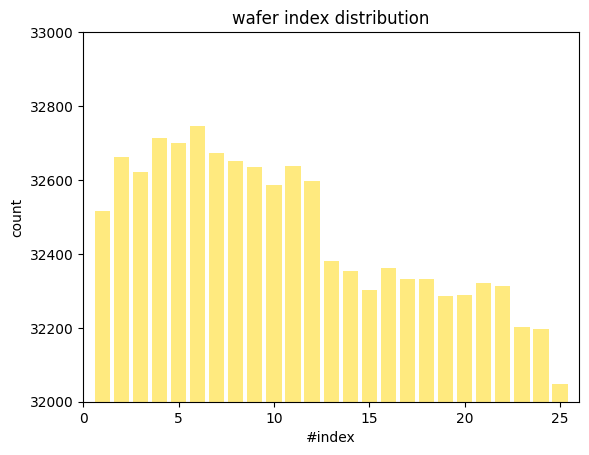

In [ ]:
################################################################################
#----------------------------Wafer Index Bar Plot-------------------------------
################################################################################
unique_index = np.unique(clean_df['waferIndex'], return_counts=True)
plt.bar(unique_index[0], unique_index[1], color='gold', align='center', alpha=0.5)
plt.title('wafer index distribution')
plt.xlabel('#index')
plt.ylabel('count')
plt.xlim(0, 26)
plt.ylim(32000, 33000)
plt.show()

In [ ]:
################################################################################
#--------------------------------Exploring Data---------------------------------
################################################################################
print(clean_df.iloc[:,1:6].nunique()) # Unique elements excluding the wafermap column
display("Clean DF: ",clean_df[['failureType','dieSize']]\
        .rename(columns = {'dieSize': '# of Maps'})\
        .groupby(['failureType']).count())

dieSize            1266
lotName           46293
waferIndex           25
trainTestLabel        3
failureType          10
dtype: int64


'Clean DF: '

,# of Maps
failureType,
Center,4294
Donut,555
Edge-Loc,5189
Edge-Ring,9680
Loc,3593
Near-full,149
Random,866
Scratch,1193
[],638507


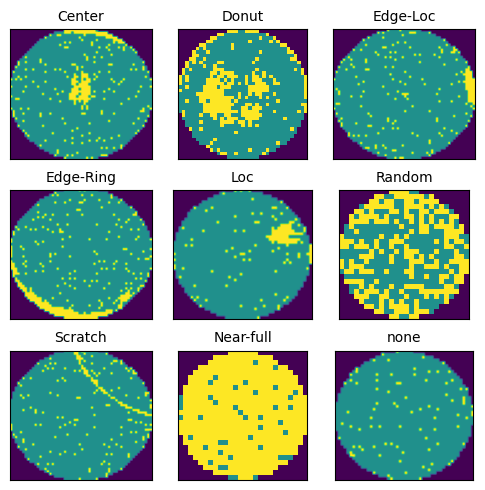

In [ ]:
################################################################################
#----------------------Plotting Fail Pattern Exm's------------------------------
################################################################################
# encoders = {
#     'Center': 0,
#     'Donut': 1,
#     'Edge-Loc': 2,
#     'Edge-Ring': 3,
#     'Loc': 4,
#     'Random': 5,
#     'Scratch': 6,
#     'Near-full': 7,
#     'none': 8,
#     '[]': 9
#     }
fig, ax = plt.subplots(nrows = 3, ncols = 3, figsize=(5,5))
# Because you defined the subplots as 2x4 then the ax handle is a 2x4 matrix
# In order to make it easier to loop through in a for loop you can flatten
# the handle to an array that's 1x8, that's what ravel does, it just flattens.
ax = ax.ravel(order='C')
for i in range(9):
    # your referencing the encoders dict you made earlier.
    # list(encoders) gives back a list of the keys.
    # You need to use .iloc[x,y] to get maps as an array, other methods retrieve
    # them as object or series and can't be plotted.
    img = clean_df[(clean_df['failureType'] == list(encoders)[i])].iloc[0,0]
    ax[i].imshow(img)
    ax[i].set_title(clean_df[(clean_df['failureType'] == list(encoders)[i])]\
                    .iloc[0,5],fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

<ipython-input-17-1b439cc4124f>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(fail_count.index.values, rotation=45, ha='right')
<ipython-input-17-1b439cc4124f>:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(fail_count.index.values[2:9], rotation=45, ha='right')


[Text(0, 0, 'Edge-Ring'),
 Text(1, 0, 'Edge-Loc'),
 Text(2, 0, 'Center'),
 Text(3, 0, 'Loc'),
 Text(4, 0, 'Scratch'),
 Text(5, 0, 'Random'),
 Text(6, 0, 'Donut')]

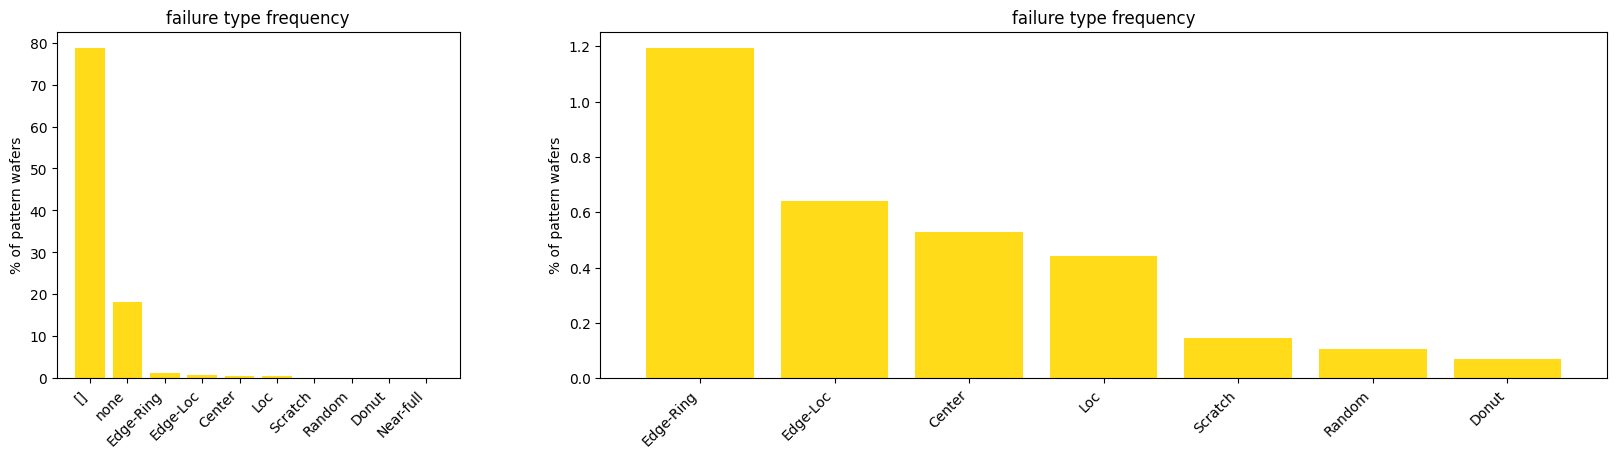

In [ ]:
################################################################################
#--------------------------Exploring Fail Patterns------------------------------
################################################################################
fail_count = clean_df[['failureType','dieSize']].rename(columns = {'dieSize': '# of Maps'})\
        .groupby(['failureType']).count().sort_values(by = "# of Maps",ascending=False)
# fail_count['# of Maps']
# Create bar chart of failure type patterns
# uni_pattern=np.unique(df_pattern['failureNum'], return_counts=True)
fig = plt.figure(figsize=(20, 4.5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

ax1.bar(fail_count.index.values,(fail_count['# of Maps']/clean_df.shape[0])*100,\
        color='gold', align='center', alpha=0.9)
ax1.set_title("failure type frequency")
ax1.set_ylabel("% of pattern wafers")
ax1.set_xticklabels(fail_count.index.values, rotation=45, ha='right')

ax2.bar(fail_count.index.values[2:9],(fail_count['# of Maps'][2:9]/clean_df.shape[0])*100,\
        color='gold', align='center', alpha=0.9)
ax2.set_title("failure type frequency")
ax2.set_ylabel("% of pattern wafers")
ax2.set_xticklabels(fail_count.index.values[2:9], rotation=45, ha='right')

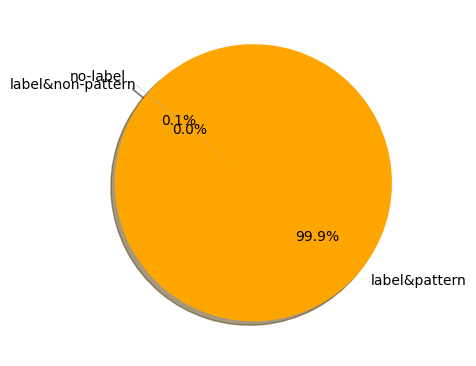

In [ ]:
################################################################################
#--------------------------Exploring Fail Patterns------------------------------
################################################################################
fig = plt.figure(figsize=(20, 4.5))
ax1 = plt.subplot()
# Create bar chart of failure type patterns
# uni_pattern=np.unique(df_pattern['failureNum'], return_counts=True)
# Create pie chart of Map labeling
colors = ['silver', 'orange', 'gold']
explode = (0.1, 0, 0)  # explode 1st slice
labels = ['no-label','label&pattern','label&non-pattern']
# fail_count['# of Maps'][8] = wafers with label []
# fail_count['# of Maps'][0:8].sum() = wafers with pattern
#
wafer_counts = [fail_count['# of Maps'][8],fail_count['# of Maps'][0:8].sum(), \
                fail_count['# of Maps'][9]]
labels = ['no-label','label&pattern','label&non-pattern']
ax1.pie(wafer_counts, explode=explode, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
del fail_count

In [ ]:
################################################################################
# ------------------Exploring the failuretype = [] -----------------------------
################################################################################
# Description: This block randomly chooses 20 wafer maps that are classified
# '[]' in the failure type and plots them
# Press Crl+Enter to continously run this block and get different maps plotted
# subset_maps = clean_df.loc[clean_df['failureType']=='[]']
# a = rd.randrange(subset_maps.shape[0])
# if a>20:
#     subset_maps = subset_maps.iloc[a-20:a]
# else:
#     subset_maps = subset_maps.iloc[0:20]

# fig, axs = plt.subplots(math.ceil(subset_maps.shape[0]/4),4)
# for i in range(math.ceil(subset_maps.shape[0]/4)):
#   for j in range(4):
#     axs[i,j].imshow(subset_maps.iloc[j+4*i,0])
#     axs[i,j].set_title(str(subset_maps.iloc[j+4*i,5])+': '+str(subset_maps.iloc[j+4*i,3]))

# Conclusion: The '[]' type maps are mostly sprinkled random defects. However,
# there are some unclassified maps as well. For now its ok to get rid of them
# for the data analysis.

In [ ]:
################################################################################
# ------------------Exploring the failuretype = none maps-----------------------
################################################################################
# Description: This block randomly chooses 20 wafer maps that are classified
# 'none' in the failure type and plots them
# Press Crl+Enter to continously run this block and get different maps plotted
# subset_maps = clean_df.loc[clean_df['failureType']=='[]']
# a = rd.randrange(subset_maps.shape[0])
# if a>20:
#     subset_maps = subset_maps.iloc[a-20:a]
# else:
#     subset_maps = subset_maps.iloc[0:20]

# fig, axs = plt.subplots(math.ceil(subset_maps.shape[0]/4),4)
# for i in range(math.ceil(subset_maps.shape[0]/4)):
#   for j in range(4):
#     axs[i,j].imshow(subset_maps.iloc[j+4*i,0])
#     axs[i,j].set_title(str(subset_maps.iloc[j+4*i,5])+': '+str(subset_maps.iloc[j+4*i,3]))

# Conclusion: The 'none' type maps are mostly sprinkled random defects.
# No obvious patterns are present.
# its ok to get rid of them for the data analysis.

# Prep for CNN Input

## Initial Prep

In [ ]:
################################################################################
#-----------------Splitting into labeled and unlabeled DF's---------------------
################################################################################
labeled = clean_df[(clean_df['failureNum'] < 9)]
un_labeled = clean_df[(clean_df['failureNum'] == 9)]
label_pattern = clean_df[(clean_df['failureNum'] < 8)]

In [ ]:
################################################################################
#-------------------Split into Train, Validate, Test----------------------------
#-----------------Disproportionate Stratified Sampling--------------------------
################################################################################
# We choose equal number of wafer maps from each group, even though some groups
# have more maps than others. Drawback with this is that we limit the max maps
# per group to the group with least maps, in this case this is Group6 = 149,
# so our dataset goes from 25,529 to 149*8 = 1,192.
test_df = label_pattern.groupby(['failureNum'], group_keys = False).apply(lambda x: x.sample(149))
test_df.reset_index(inplace = True, drop = True)# reseting index inplace
# strata1_df.head()
display("Disproportionate Stratified DF: ",test_df[['failureNum','failureType','dieSize']]\
        .rename(columns = {'dieSize': '# of Maps'}).groupby(['failureNum','failureType']).count())

'Disproportionate Stratified DF: '

,,# of Maps
failureNum,failureType,
0,Center,149
1,Donut,149
2,Edge-Loc,149
3,Edge-Ring,149
4,Loc,149
5,Random,149
6,Scratch,149
7,Near-full,149


In [ ]:
################################################################################
#-----------------------------Splitting Train DF--------------------------------
################################################################################
# Concat sampled df to original df
train = pd.concat([test_df, label_pattern])
# Use index difference to remove sampled data from original df so that the
# next time you sample you don't sample the same data (i.e. sample w/o
# replacement)
train = train.loc[train.index.difference(test_df.index),]
train.reset_index(inplace = True, drop = True)# reseting index inplace
test_df.reset_index(inplace = True, drop = True)# reseting index inplace

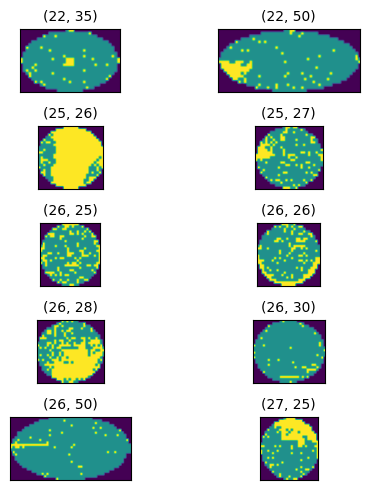

In [ ]:
################################################################################
#-------------------Verifying all small dim maps are valid---------------------
################################################################################
small_dims = label_pattern['waferMapDim'].sort_values().unique()[0:10]
fig, ax = plt.subplots(nrows = 5, ncols = 2, figsize=(5,5))
ax = ax.ravel(order='C')
for i in range(10):
    # You need to use .iloc[x,y] to get maps as an array, other methods retrieve
    # them as object or series and can't be plotted.
    img = label_pattern[(label_pattern['waferMapDim'] == small_dims[i])].iloc[0,0]
    ax[i].imshow(img)
    ax[i].set_title(label_pattern[(label_pattern['waferMapDim'] == small_dims[i])]\
                    .iloc[0,6],fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

## Resizing Maps

In [ ]:
################################################################################
#----------------------------Libraries Import----------------------------------
################################################################################
import cv2

In [ ]:
################################################################################
#----------------------------Resize Maps Function-------------------------------
################################################################################
# NOTE: The images input need to be a list or series, so if you have np.array
# as input you need to mylist.append(myarray) prior to feeding it as input.
def resize_images(images, map_size = (64,64)):
  # Resizing input images
  images = images.apply(lambda x: cv2.resize(x, dsize=map_size,\
                                                   interpolation=cv2.INTER_NEAREST))
  return images

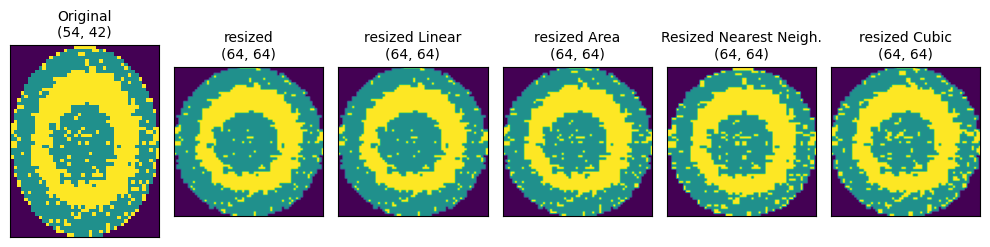

In [ ]:
################################################################################
#----------------------Exploring methods to Resize Maps-------------------------
################################################################################
x_test, y_test = [], []
dsize = (64, 64)
# Extracts 3 wafer maps of a particular failure type into a pandas series.
extracted = label_pattern[label_pattern['failureType'] == 'Donut'].sample(1, replace=True)['waferMap']
extracted.reset_index(inplace = True, drop = True)# reseting index inplace
resized = extracted.apply(lambda x:cv2.resize(x, dsize=dsize))
# When resizing the maps we apply 5 diff. data imputation methods (interpolation)
# to see which works best: INTER_LINEAR, INTER_AREA, INTER_NEAREST, INTER_CUBIC,
# INTER_LANCZOS4
resized_interLinear = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_LINEAR))
resized_interArea = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_AREA))
resized_interNN = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_NEAREST))
resized_interCubic = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_CUBIC))
resized_interLANCZ = extracted.apply(lambda x:cv2.resize(x, dsize=dsize, interpolation=cv2.INTER_LANCZOS4))
# augmented = np.array(augment_images(resized))
# reshaped = reshape_images(augmented, dsize[1], dsize[0])

# ------------------------------Plotting Resize maps----------------------------
fig, ax = plt.subplots(nrows = 1, ncols = 6, figsize=(10,10))
# Because you defined the subplots as 2x4 then the ax handle is a 2x4 matrix
# In order to make it easier to loop through in a for loop you can flatten
# the handle to an array that's 1x8, that's what ravel does, it just flattens.
ax = ax.ravel(order='C')
x= ['Original','resized','resized Linear', 'resized Area', 'Resized Nearest Neigh.',\
    'resized Cubic','resized Lancz']
img = [extracted[0],resized[0],resized_interLinear[0],resized_interArea[0], \
       resized_interNN[0], resized_interCubic[0], resized_interLANCZ[0]]
for i in range(len(ax)):
    ax[i].imshow(img[i])
    ax[i].set_title(x[i]+"\n"+str(img[i].shape),fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()
# --------------------------------Conclusion------------------------------------
# From the interpolated results the best methods are either resized Area or
# resized Nearest Neigh. I choose Nearest Neigh over resized area for no good
# reason.

## Augmenting Maps

In [ ]:
################################################################################
#-----------------------------Libraries Import----------------------------------
################################################################################
import imgaug as ia
import imgaug.augmenters as iaa

In [ ]:
################################################################################
#--------------------------Augmenting Maps Function-----------------------------
################################################################################
def augment_images(images, number=None):
    # Defining the augmenter model/function. You will later use this and call upon
    # it to augment maps.
    seq = iaa.Sequential([
        # iaa.Fliplr(1), # horizontally flip 50% of the images
        # Apply affine transformations to some of the images
        iaa.Affine(
            # - scale to 80-120% of image height/width (each axis independently)
            # scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            # Translate images by a certain percent
            # "x": (- Left translation, +right translation)
            # "y": (- Left translation, +right translation)
            # translate_percent={"x": (-0.05, 0.05), "y": (-0.05, 0.05)},
            # rotate randomly by 90,-90, -180 or +180 degrees
            rotate=(np.random.choice([90,-90,180,-180])),
            # shear by -X to +X degrees, it will randomly choose a choose a degree
            # of shearing between these two numbers.
            # shear=(-30,30)
        ),
    ], random_order=True) # apply augmenters in random order
    # Randomly choose "number" maps from the "images" input if number is given
    # as input, if no number is given as input then it will return the entire
    # images array. This means it will apply the augmentation to the entire
    # input array, or you can apply to subset only "number".
    images_input = np.random.choice(images, number) if number else images
    images_expanded = []
    # This just makes a copy of the images_input array as a list
    for image in images_input:
        images_expanded.append(image)
    # Converts to numpy array since the image augmenter only accepts these
    # data types, in order to do this, it assumed that all the images are same
    # size.
    images_expanded = np.array(images_expanded)
    # Saves an array with the augmented images
    images_augmented = seq(images=images_expanded)
    return images_augmented

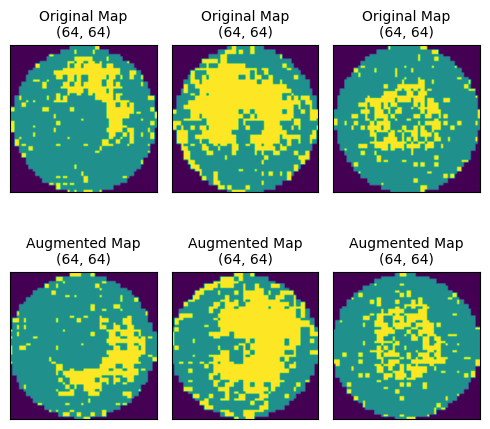

In [ ]:
################################################################################
#-------------------------Augmenting Maps Examples------------------------------
################################################################################
# Create an array of augmented images
test_maps = label_pattern[label_pattern['failureType'] == 'Donut']['waferMap']\
            .sample(3, replace=True).reset_index(drop = True)
test_maps = resize_images(test_maps)
# test_maps = test_maps.apply(lambda x: cv2.resize(x, dsize=dsize,\
#                                                    interpolation=cv2.INTER_AREA))
augmented = np.array(augment_images(test_maps))
# -----------------------------Plotting Results--------------------------------
fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize=(5,5))
# ax = ax.ravel(order='C')
for i in range(ax.shape[0]):
  if i == 0:
    for j in range(ax.shape[1]):
      ax[i][j].imshow(test_maps[j])
      ax[i][j].set_title("Original Map"+"\n"+str(test_maps[i].shape),\
                         fontsize=10)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
  else:
    for j in range(ax.shape[1]):
      ax[i][j].imshow(augmented[j])
      ax[i][j].set_title("Augmented Map"+"\n"+str(augmented[i].shape),\
                         fontsize=10)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
plt.tight_layout()
plt.show()

## One hot encoding

In [ ]:
################################################################################
#--------------------------One Hot Encode Maps Function-------------------------
################################################################################
# This function first one hot encodes maps with 0, 1, 2 values into 3 diff maps.
# NOTE 1: If you don't define a target height and width, then it won't resize the
# maps prior to encoding, if you don't resize the maps prior to encoding
# then it will return an array of array's, which is NOT usable for tensorflow!
# Therefore, you need to either always specify a height and width or resize
# the maps/images prior to feeding them into this function.
# NOTE 2: The images input need to be a list or series, so if you have np.array
# as input you need to mylist.append(myarray) prior to feeding it as input.
def encode_images(images, map_size = (None, None) ):
  one_hot_maps = []
  # This resized the input images if a map_size is given, else
  # it will do nothing.
  resized_maps = resize_images(images, map_size) \
                if (map_size[0] and map_size[1]) else images
  for j in range(resized_maps.shape[0]):
    # One hot encoding: Using fancy compare you can compare an entire map at
    # once (images[j] == i), since it'll give a boolean output you need to
    # convert to int after (.astype(int)), lastly transpose((1,2,0)) changes the
    # dimensions so that you have (nth_map,height,width) instead of (height,width,nth_map)
    encoded_map = np.array([(resized_maps[j] == i).astype(int) for i in range(3)])\
    .transpose((1,2,0))
    one_hot_maps.append(encoded_map)
  # We convert to np.array before returning results since tensorflow needs
  # np.array's as input to work.
  return np.array(one_hot_maps)

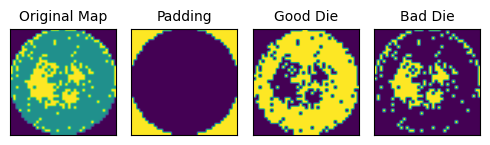

In [ ]:
################################################################################
#----------------------How to: One Hot encode Maps------------------------------
################################################################################
# Saving a donut map as an example
map_exm = label_pattern[(label_pattern['failureType'] == 'Donut')].iloc[0,0]
# map_exm.reset_index(drop=True, inplace = True)
# smallest_map.reset_index(inplace = True, drop = True)# reseting index inplace
# for line in smallest_map:
#   print('\t'.join(map(str, smallest_map)))
# reshaped_images_test = np.zeros((1,map_exm.shape[0], map_exm.shape[1], 3))
# The above line creates a 4 dim array, the idea is to hold RGB maps where the
# RGB components are held in the last dimension. You start with zero maps and
# then fill each RGB component with a 1 according to whether its a Good Die,
# bad Die or Padding. We take advantage of how the Good, bad and padding are
# saved in order to do this:
# 1 = Good die
# 2 = Bad Die
# 0 = Padding
# So we save the padding in the first component
# (i.e. [0,:,:,0]), we then save the good die in the next component
# (i.e. [0,:,:,1]) and finally save the bad die in the last component
# (i.e. [0,:,:,2]). Here's an example:

# Original Map: [0,8,10]
# 0 0 0 1 1 1 0 0 0 0
# 0 0 1 1 1 1 1 0 0 0
# 0 1 1 2 2 2 1 1 0 0
# 1 1 1 2 2 2 1 1 1 0
# 0 1 1 2 2 2 1 1 0 0
# 0 0 1 1 1 1 1 0 0 0
# 0 0 0 1 1 1 0 0 0 0
# 0 0 0 0 0 0 0 0 0 0
# First component[0,;,;,0]   Second component[0,;,;,1] Last component[0,;,;,2]
# (Padding)                   (Good Die)                (Bad Die)

# 1 1 1 0 0 0 1 1 1 1        # 0 0 0 1 1 1 0 0 0 0    # 0 0 0 0 0 0 0 0 0 0
# 1 1 0 0 0 0 0 1 1 1        # 0 0 1 1 1 1 1 0 0 0    # 0 0 0 0 0 0 0 0 0 0
# 1 0 0 0 0 0 0 0 1 1        # 0 1 1 0 0 0 1 1 0 0    # 0 0 0 1 1 1 0 0 0 0
# 0 0 0 0 0 0 0 0 0 1        # 1 1 1 0 0 0 1 1 1 0    # 0 0 0 1 1 1 0 0 0 0
# 1 0 0 0 0 0 0 0 1 1        # 0 1 1 0 0 0 1 1 0 0    # 0 0 0 1 1 1 0 0 0 0
# 1 1 0 0 0 0 0 1 1 1        # 0 0 1 1 1 1 1 0 0 0    # 0 0 0 0 0 0 0 0 0 0
# 1 1 1 0 0 0 1 1 1 1        # 0 0 0 1 1 1 0 0 0 0    # 0 0 0 0 0 0 0 0 0 0
# 1 1 1 1 1 1 1 1 1 1        # 0 0 0 0 0 0 0 0 0 0    # 0 0 0 0 0 0 0 0 0 0

# The key line is this one:
# reshaped_images_test[0,h, w, smallest_map[0][h][w]] = 1
# for each X,Y of the zero'ed map it will assign a 1 on a given dimension
# depepnding if said coordinate was padding, good or bad die. For h=w=0 you will
# get a "1" on the padding component and all else will remain zero.

# The below for loop is a bit of an inneficient way of doing this compare
# for h in range(map_exm.shape[0]):
#     for w in range(map_exm.shape[1]):
#         reshaped_images_test[0,h, w, map_exm[h][w]] = 1
# The better way is this one liner I got from stackexchange.
# .transpose((1,2,0)) reorders the axes from (3,X_dim, Y_dim) to
# (X_dim, Y_dim, 3), where 3 is either the padding, Good Die or Bad Die
# [None] adds a fourth dimension to the array making it (nth_image, x_dim, y_dim, 3)
one_hot_test = np.array([(map_exm == i).astype(int) for i in range(3)])\
                              .transpose((1,2,0))[None]

# --------------------------Plotting Results------------------------------------
fig, ax = plt.subplots(nrows = 1, ncols = 4, figsize=(5,5))
ax = ax.ravel(order='C')
x = np.array([map_exm,one_hot_test[0,...,0],\
             one_hot_test[0,...,1],one_hot_test[0,...,2]])
title = ['Original Map','Padding','Good Die','Bad Die']
for i in range(len(ax)):
    ax[i].imshow(x[i])
    ax[i].set_title(title[i],fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

## Prep'ing Test Data

In [ ]:
################################################################################
#----------------------------Prep'ing Test Data --------------------------------
# ---------------------------w/ Custom Generator -------------------------------
################################################################################
# NOTE: The "Input" is assumed to be a DF with the maps in a colum named 'wafermap'
# NOTE: You can define a map_size to resize the images if you want, the default
# is (64,64)
def test_gen(input_df, batch_size = 100, map_size = (64,64)):
    # num = 0
  # while True:
    x_test, y_test = [], []
    class_num = 8 # Limit to only labeled fail patterns [0,1,2,3,4,5,6,7]
    # Sampling batch_size of data from the the Input
    test = input_df.sample(n=batch_size, replace=False)#, random_state=1)
    test.reset_index(inplace = True, drop = True)# reseting index inplace
    # One hot encode maps, this returns a np.array and also resizes maps.
    encoded_maps = encode_images(test['waferMap'], map_size )
    # Creates a 510x8 array of all zeros
    labels = np.zeros((encoded_maps.shape[0], class_num))
    # fills in only the column corresponding to the failNum with "1"
    for i in range(encoded_maps.shape[0]):
        labels[i][test['failureNum'][i]] = 1
    del test
    x_test.extend(encoded_maps)
    y_test.extend(labels)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # display("there are ",len(x_test),"maps for testing")
    # num += 1
    yield(x_test, y_test)

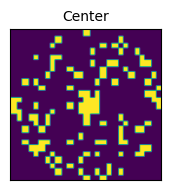

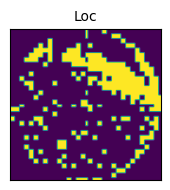

In [ ]:
################################################################################
# Cute little func to plot results of custom gen's
################################################################################
# Mental note, I wrote this code in ~10min and is so nice and neat, looking back
# I would've never been able to this even 1 month ago, I feel I'm finally making
# progress (11/5/23) :)
for map, label in test_gen(test_df,2):
  encoded_keys = np.where(label == 1)[1][:]
  fail_type = []
  [fail_type.append(list(encoders.keys())[key]) for key in encoded_keys]
  [plot_map(map[i,...,2], fail_type[i]) for i in range(label.shape[0])]

## Prep'ing Train Data

In [ ]:
################################################################################
#----------------------------Prep'ing Train Data--------------------------------
# ---------------------------w/ Custom Generator--------------------------------
################################################################################
def train_gen(input_df, batch_size = 100, map_size = (64,64)):
  while True:
    x_train, y_train = [], []
    class_num = 8 # Limit to only labeled fail patterns [0,1,2,3,4,5,6,7]
    # while temp_label.shape[0] > 1000:
    # for i in range(30):
    # Randomly sampling some of data from the the labeled data only
    train = input.sample(n=batch_size, replace=False)
    # You reset the index on the sampled df
    train.reset_index(inplace = True, drop = True)# reseting index inplace
    # Resize maps
    resized_maps = resize_images(train['waferMap'], map_size)
    # display("Input size:", input.shape[0])
    # This Augments (i.e. distorts) images. Note that it will return np.array
    # per definition of the function, which is what you need for CNN.
    augmented_maps = augment_images(resized_maps)
    # One hot encode maps
    encoded_maps = encode_images(augmented_maps)
    # Creates an array of all zeros
    labels = np.zeros((encoded_maps.shape[0], class_num))
    # fills in only the column corresponding to the failNum with "1"
    for i in range(encoded_maps.shape[0]):
        labels[i][train['failureNum'][i]] = 1
    # Saving to a test array.
    x_train.extend(encoded_maps)
    y_train.extend(labels)
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    # display("there are ",len(x_train),"maps for training")
    yield(x_train, y_train)

In [ ]:
################################################################################
# Cute little func to plot results of custom gen's
################################################################################
# for map, label in train_gen(train,2, (128,128)):
#   encoded_keys = np.where(label == 1)[1][:]
#   fail_type = []
#   [fail_type.append(list(encoders.keys())[key]) for key in encoded_keys]
#   [plot_map(map[i,...,2], fail_type[i]+str(map.shape)) for i in range(label.shape[0])]

## Prep'ing Validation Data

In [ ]:
################################################################################
#----------------------Prep'ing Validation Data --------------------------------
# -----------------------w/ Custom Generator -----------------------------------
################################################################################
# NOTE: This gen is infinite while the test_gen is not! This is needed in order
# to feed this into the .fit function
# NOTE: You can define a map_size to resize the images if you want, the default
# is (64,64)
def validate_gen(input_df, batch_size = 100, map_size = (64,64)):
    # num = 0
  while True:
    x_test, y_test = [], []
    class_num = 8 # Limit to only labeled fail patterns [0,1,2,3,4,5,6,7]
    # Sampling batch_size of data from the the Input
    test = input_df.sample(n=batch_size, replace=False)#, random_state=1)
    test.reset_index(inplace = True, drop = True)# reseting index inplace
    # One hot encode maps, this returns a np.array and also resizes maps.
    encoded_maps = encode_images(test['waferMap'], map_size )
    # Creates a 510x8 array of all zeros
    labels = np.zeros((encoded_maps.shape[0], class_num))
    # fills in only the column corresponding to the failNum with "1"
    for i in range(encoded_maps.shape[0]):
        labels[i][test['failureNum'][i]] = 1
    del test
    x_test.extend(encoded_maps)
    y_test.extend(labels)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    # display("there are ",len(x_test),"maps for testing")
    # num += 1
    yield(x_test, y_test)

In [ ]:
################################################################################
# Cute little func to plot results of custom gen's
################################################################################
# for map, label in validate_gen(test,2):
#   encoded_keys = np.where(label == 1)[1][:]
#   fail_type = []
#   [fail_type.append(list(encoders.keys())[key]) for key in encoded_keys]
#   [plot_map(map[i,...,2], fail_type[i]) for i in range(label.shape[0])]

## Filtering

In [ ]:
# loading libraries
import skimage
from skimage import measure
from skimage.transform import radon
from skimage.transform import probabilistic_hough_line
from scipy import interpolate
from scipy import stats

In [ ]:
################################################################################
#----------------------Figuring out measure.label------------------------------
################################################################################
# label works by assigning labels starting from "1,2,3...", it assumes that anything with a value of "0" is background and will not be considered within the
# labeling process. However, you can change that, if you actually have "0's" in your data set that you WANT to label, then you just set background =-1. This
# way only values with "-1" will be considered background (which typically don't occur). You could also set background = 100, or some other positive number that
# you think is not in your dataset, but is safer to set it to something that is unlikely to appear in your input such as "-1".
# Connectivity defines how many orthongal hops are needed to consider another cell (w/ the same value) a neighbour. "2" is default and means orthogongal and diagonal
# neighbours (total=8) are considered. Connectivity=1 means only diagonal neighbours are considered.
x = np.matrix([
  [1, 0, 0, 2, 1, 2, 0, 0, 0, 0],
  [0, 0, 2, 1, 1, 1, 2, 0, 0, 0],
  [0, 2, 1, 2, 2, 2, 1, 2, 0, 0],
  [2, 1, 1, 2, 2, 2, 1, 1, 2, 0],
  [0, 2, 1, 2, 2, 2, 1, 2, 0, 0],
  [0, 0, 2, 1, 1, 1, 2, 0, 0, 0],
  [0, 0, 0, 2, 1, 2, 0, 0, 0, 0],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
])


# NOTE display can't recognize new line escapes "\n"
print(f"This is x w/o any labeling:\n {x}")
print(f"\nThis is \"labeled\" x w/ background=0 & connectivity=2 (defaults):\n\
{measure.label(x)}")
print(f"\nThis is \"labeled\" x w/ background=0 & connectivity=1:\n \
{measure.label(x,connectivity = 1)}")
print(f"\nThis is \"labeled\" x w/ background!=0 & connectivity=2:\n \
{measure.label(x,background=-1)}")




This is x w/o any labeling:
 [[1 0 0 2 1 2 0 0 0 0]
 [0 0 2 1 1 1 2 0 0 0]
 [0 2 1 2 2 2 1 2 0 0]
 [2 1 1 2 2 2 1 1 2 0]
 [0 2 1 2 2 2 1 2 0 0]
 [0 0 2 1 1 1 2 0 0 0]
 [0 0 0 2 1 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

This is "labeled" x w/ background=0 & connectivity=2 (defaults):
[[1 0 0 2 3 2 0 0 0 0]
 [0 0 2 3 3 3 2 0 0 0]
 [0 2 3 2 2 2 3 2 0 0]
 [2 3 3 2 2 2 3 3 2 0]
 [0 2 3 2 2 2 3 2 0 0]
 [0 0 2 3 3 3 2 0 0 0]
 [0 0 0 2 3 2 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

This is "labeled" x w/ background=0 & connectivity=1:
 [[ 1  0  0  2  3  4  0  0  0  0]
 [ 0  0  5  3  3  3  6  0  0  0]
 [ 0  7  8  9  9  9 10 11  0  0]
 [12  8  8  9  9  9 10 10 13  0]
 [ 0 14  8  9  9  9 10 15  0  0]
 [ 0  0 16 17 17 17 18  0  0  0]
 [ 0  0  0 19 17 20  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]]

This is "labeled" x w/ background!=0 & connectivity=2:
 [[1 2 2 3 4 3 5 5 5 5]
 [2 2 3 4 4 4 3 5 5 5]
 [2 3 4 3 3 3 4 3 5 5]
 [3 4 4 3 3 3 4 4 3 5]
 [5 3 4 3 3 3 4 3 5 5]
 [5 5 3 4 4 4 3 5 5 5]
 [5 5 5 3 4 3 5 5 5

In [ ]:
def filter_maps(input_df):
  maps = []
  labels = []
  filtered_maps = []
  # Saving some maps and labels
  for map, label in test_gen(input_df,input_df.shape[0]):
    maps.append(map)
    labels.append(label)
  # Making the maps into a np.array for ease of use
  maps = np.squeeze(np.array(maps))
  # Filtering maps
  for i in range(maps.shape[0]):
    # plot_map(scratch_maps[0][i,:,:,2])
    filtered_map = measure.label(maps[i,:,:,2], connectivity=1)
    tgt_pattern = stats.mode(filtered_map[filtered_map>0], axis = None)
    tgt_coords = np.where(filtered_map == tgt_pattern[0])
    background_coords = np.where(filtered_map != tgt_pattern[0])
    filtered_map[background_coords] = 0
    filtered_maps.append(filtered_map)
  # Converting to np.array for ease of use
  filtered_maps = np.array(filtered_maps)

  return(filtered_maps, maps[:,:,:,2])

In [ ]:
filtered, unfiltered = filter_maps(test_df[test_df['failureType'] == 'Scratch'])

In [ ]:
nrows

75

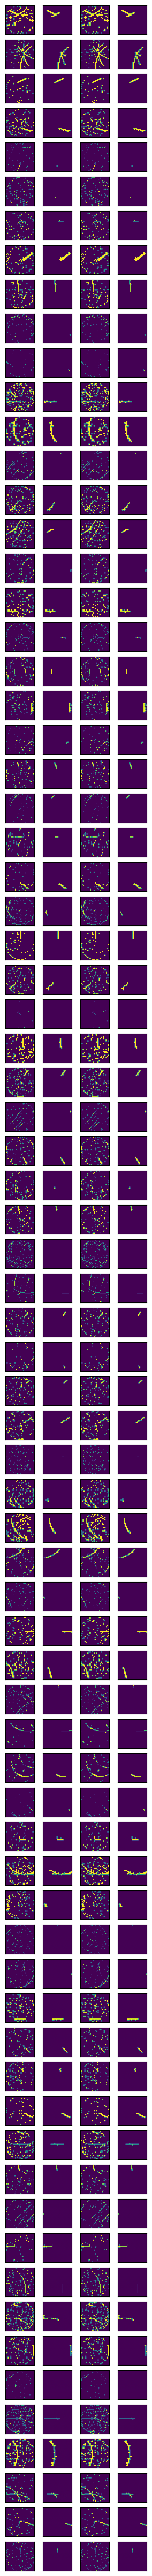

In [ ]:
# n_rows = math.ceil(unfiltered.shape[0] / 2)
n_rows = 75
n_cols = 4
# fig, ax = plt.subplots(nrows = n_rows, ncols = n_cols, sharex=True, sharey=True)
lx,ly = 200,180
margin = 0.3 #inch
spacing =0.1 #inch
imsize = 0.6 #inch

figwidth=n_cols*imsize+(n_cols-1)*spacing+2*margin
figheight=n_rows*imsize*ly/lx+(n_rows-1)*spacing+2*margin

left=margin/figwidth
bottom = margin/figheight

fig, ax = plt.subplots(nrows=n_rows,ncols=n_cols, sharex=True, sharey=True)
fig.set_size_inches(figwidth,figheight)
fig.subplots_adjust(left=left, bottom=bottom, right=1.-left, top=1.-bottom,
                    wspace=spacing/imsize, hspace=spacing/imsize*lx/ly)
# ax = ax.ravel(order='C')
for i in range(ax.shape[0]):
  for j in range(ax.shape[1]):
    if j % 2 == 0:
      ax[i][j].imshow(unfiltered[i])
      # ax[i][j].set_title("Unfiltered",fontsize=10)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
    else:
      ax[i][j].imshow(filtered[i])
      # ax[i][j].set_title("filtered",fontsize=10)
      ax[i][j].set_xticks([])
      ax[i][j].set_yticks([])
# plt.tight_layout()
# plt.gca().set_axis_off()
# plt.subplots_adjust(top = 0.5, bottom = 0, right = 0.2, left = 0,
#             hspace = 0, wspace = 0)
# plt.margins(0,0)
plt.show()

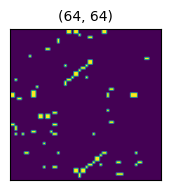

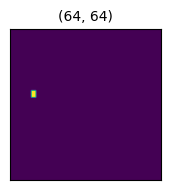

In [ ]:
################################################################################
#----------------------Filtering Scratches------------------------------
################################################################################
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))

scratches = test_df[test_df['failureType'] == 'Scratch']
scratches.reset_index(inplace = True, drop = True)
scratch_maps = []
scratch_labels = []
for map, label in test_gen(scratches,scratches.shape[0], (64,64)):
  scratch_maps.append(map)
  scratch_labels.append(label)
# for i in range(scratch_maps[0].shape[0]):
#     plot_map(scratch_maps[0][i,:,:,2])

# map = map.waferMap[1]
# map[np.where(map == 1)] = 0
# plot_map(map[0,:,:,2])
# filtered_map = np.zeros(map[0,:,:,2].shape)
filtered_map = measure.label(scratch_maps[0][0,:,:,2], connectivity=1)
plot_map(scratch_maps[0][0,:,:,2])

tgt_pattern = stats.mode(filtered_map[filtered_map>0], axis = None)
tgt_coords = np.where(filtered_map == tgt_pattern[0])
background_coords = np.where(filtered_map != tgt_pattern[0])
filtered_map[background_coords] = 0
# # filtered_map[coords] = 9
plot_map(filtered_map)

# img = map
# zero_img = np.zeros(img.shape)
# img_labels = measure.label(img,connectivity=1, background=0)
# img_labels = img_labels-1
# fig, ax = plt.subplots(nrows = 2, ncols = 4,figsize=(20, 10))
# ax = ax.ravel(order='C')
# if img_labels.max()==0:
#     no_region = 0
# else:
#     info_region = stats.mode(img_labels[img_labels>-1], axis = None)
#     no_region = info_region[0]
# np.where(img_labels==no_region)
# zero_img[np.where(img_labels==no_region)] = 2
# ax[i].imshow(zero_img)
# ax[i].set_title("test",fontsize=10)
# ax[i].set_xticks([])
# plt.tight_layout()
# plt.show()

In [ ]:
scratch_maps = np.squeeze(np.array(scratch_maps))
print(scratch_maps.shape)
# scratch_maps = np.squeeze(scratch_maps, axis =0)
# print(scratch_maps.shape)

(149, 64, 64, 3)


# CNN

## Importing Libs

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
# from tensorflow.keras.layers import Input, Conv2D, Dense, MaxPool2D
# from tensorflow.keras.layers import Flatten, Softmax, SpatialDropout2D
# from tensorflow.keras.layers import BatchNormalization
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.optimizers import Adam

## Setting the GPU

In [ ]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

## LENET Model

### Model definition

In [ ]:
################################################################################
#-------------------------------Global Parameters-------------------------------
################################################################################
map_size = (64,64)
################################################################################
#-------------------------------LeNet Model-------------------------------------
################################################################################
def lenet(input_shape = (None, None, None)):
  inputs = keras.Input(shape=input_shape)
  x = layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu')(inputs)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D()(x) #Default is 2x2

  x = layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D()(x) #Default is 2x2

  x = layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu')(x)
  x = layers.BatchNormalization()(x)
  x = layers.MaxPooling2D()(x) #Default is 2x2

  x = layers.Flatten()(x)
  x = layers.Dense(64, activation = 'relu')(x)

  x = layers.Dense(32, activation = 'relu')(x)

  outputs = layers.Dense(8, activation = 'softmax')(x)

  model = keras.Model(inputs = inputs, outputs = outputs)

  return model
################################################################################
#---------------------------------Compiling-------------------------------------
################################################################################
lenet = lenet((*map_size,3)) # Remember to unpack the map_size tuple
lenet.compile(
    loss = keras.losses.CategoricalCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate = 1E-3),
    metrics = ["accuracy"]
)
# x_train_tensor = tf.constant(x_train)
# y_train_tensor = tf.constant(y_train)
# lenet.fit(x_train, y_train, batch_size = 1500, epochs = 10, verbose = 2)

### Plot model architecture

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 batch_normalization (Batch  (None, 62, 62, 16)        64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 29, 29, 32)        128   

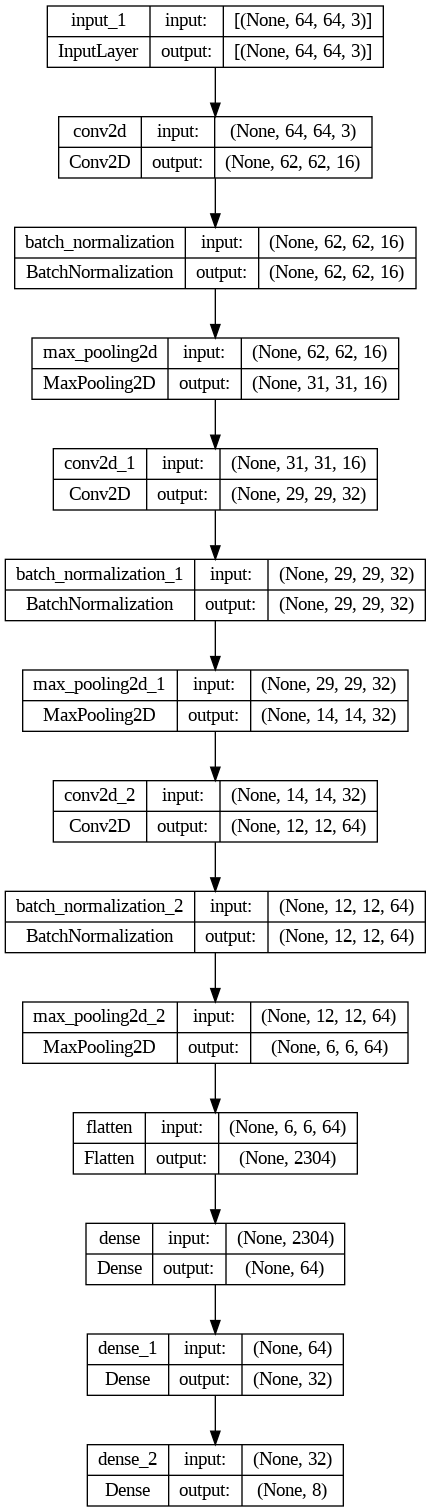

In [ ]:
lenet.summary()
# Plotting model arquitecture
from tensorflow.keras.utils import plot_model
plot_model(lenet, show_shapes=True, show_layer_names=True)

### Training model

In [ ]:
batch_size = 100
# NOTE: In order to use gen's for the training and validation data set the gen's
# must both be infinite!
history = lenet.fit(train_gen(train,batch_size,map_size), steps_per_epoch = train.shape[0] // batch_size,\
                    validation_data = validate_gen(test_df,batch_size,map_size), validation_steps = test_df.shape[0] // batch_size, \
                    epochs = 10)

Epoch 1/10
254/254 [==============================] - 32s 77ms/step - loss: 0.4946 - accuracy: 0.8151 - val_loss: 1.4898 - val_accuracy: 0.5327
Epoch 2/10
254/254 [==============================] - 19s 76ms/step - loss: 0.3166 - accuracy: 0.8786 - val_loss: 0.5287 - val_accuracy: 0.7827
Epoch 3/10
254/254 [==============================] - 19s 75ms/step - loss: 0.2703 - accuracy: 0.8953 - val_loss: 0.4608 - val_accuracy: 0.8400
Epoch 4/10
254/254 [==============================] - 36s 142ms/step - loss: 0.2547 - accuracy: 0.9026 - val_loss: 0.5834 - val_accuracy: 0.7736
Epoch 5/10
254/254 [==============================] - 19s 74ms/step - loss: 0.2276 - accuracy: 0.9148 - val_loss: 0.5407 - val_accuracy: 0.7964
Epoch 6/10
254/254 [==============================] - 18s 72ms/step - loss: 0.2095 - accuracy: 0.9205 - val_loss: 0.4796 - val_accuracy: 0.8282
Epoch 7/10
254/254 [==============================] - 21s 84ms/step - loss: 0.1933 - accuracy: 0.9295 - val_loss: 0.5180 - val_accuracy

### Evaluating Model

In [ ]:
################################################################################
#------------------------Getting loss & Accuracy--------------------------------
################################################################################
fail_patterns = test_df['failureType'].unique()
losses = []
accuracies = []
labels = []
for label in fail_patterns:
  input_df = test_df[(test_df['failureType'] == label)]
  no_maps = test_df[(test_df['failureType'] == label)].shape[0]
  # using the generator call to evaluate (don't define batch_size input)
  (loss, accuracy) = lenet.evaluate(test_gen(input_df,no_maps), verbose = 0)
  losses.append(loss)
  accuracies.append(accuracy)
  labels.append(label)

# Converting to dataframe since its easier to handle than lists
eval_df = pd.DataFrame({'losses':losses, 'accuracies': accuracies,\
                        'labels': labels})
# Sorting by accuracy column
eval_df.sort_values(by = 'accuracies', inplace = True)
eval_df

,losses,accuracies,labels
6,1.278185,0.516779,Scratch
7,0.837629,0.731544,Near-full
2,0.543658,0.812081,Edge-Loc
4,0.539545,0.818792,Loc
1,0.316117,0.912752,Donut
3,0.168207,0.919463,Edge-Ring
5,0.290704,0.919463,Random
0,0.270977,0.926175,Center


<ipython-input-48-9d86f244f42d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(eval_df.labels, rotation=45, ha='right')


[Text(0, 0, '51.68'),
 Text(0, 0, '73.15'),
 Text(0, 0, '81.21'),
 Text(0, 0, '81.88'),
 Text(0, 0, '91.28'),
 Text(0, 0, '91.95'),
 Text(0, 0, '91.95'),
 Text(0, 0, '92.62')]

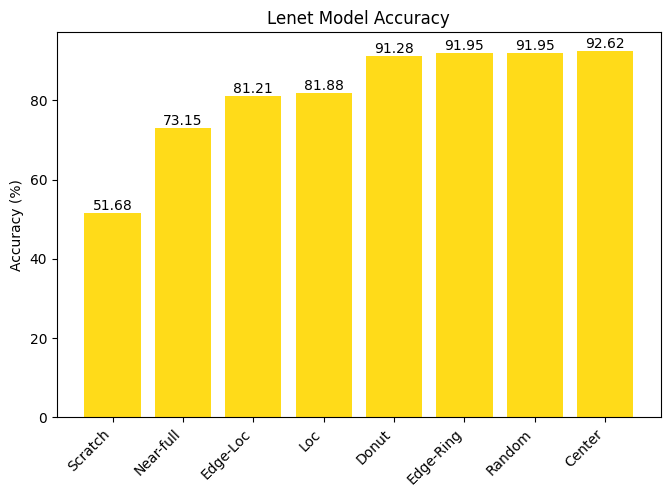

In [ ]:
################################################################################
#------------------------Plotting loss & Accuracy-------------------------------
################################################################################
fig = plt.figure(figsize=(30, 5))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 2.5])
ax = plt.subplot(gs[0])

ax.bar(eval_df.labels,round(eval_df.accuracies*100,2),color='gold', align='center', alpha=0.9)
ax.set_title("Lenet Model Accuracy")
ax.set_ylabel("Accuracy (%)")
ax.set_xticklabels(eval_df.labels, rotation=45, ha='right')
# display labels on each bar
ax.bar_label(ax.containers[0], label_type='edge')

### EDA on model results

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


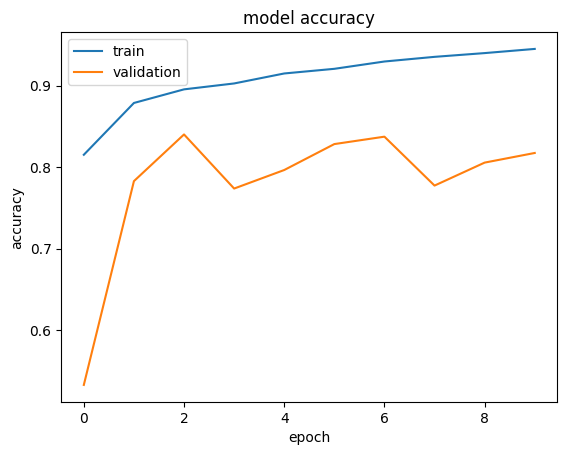

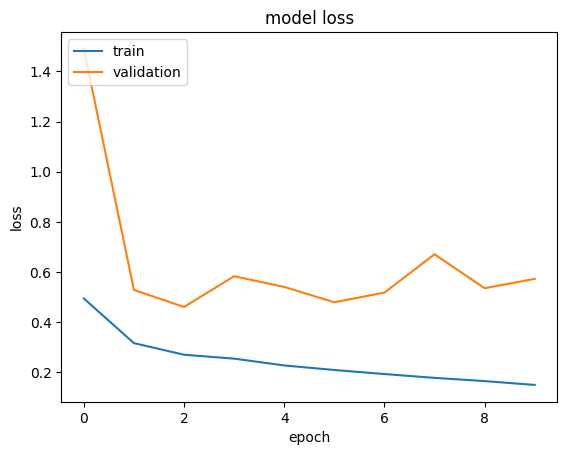

In [ ]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

### EDA on wrong predictions

In [ ]:
################################################################################
#-----------------------------Making predcitions--------------------------------
################################################################################
predict_maps =[]
predict_labels = []
no_predictions = 15000
# save some maps and labels from the test_gen to use in .predict
for map, label in test_gen(label_pattern,no_predictions):
  predict_maps.append(map)
  predict_labels.append(label)
# Convert the matrix of y-labels to an array with encoded keys only
actual_labels = np.nonzero(predict_labels[0] ==  1)[1]
# Translating the encoded labels to named labels
actual_labels = list(actual_labels)
for idx, item in enumerate(actual_labels):
  actual_labels[idx] = list(encoders.keys())[item]
# Make prediction and extract indice of predictions (which is the encoded key)
predicted_labels = np.argmax(lenet.predict(predict_maps, verbose = 0),1)
# Translating the encoded labels to named labels
predicted_labels = list(predicted_labels)
for idx, item in enumerate(predicted_labels):
  predicted_labels[idx] = list(encoders.keys())[item]
# print("Predicted Labels:", predicted_labels, "\nActual Labels:   ",actual_labels)

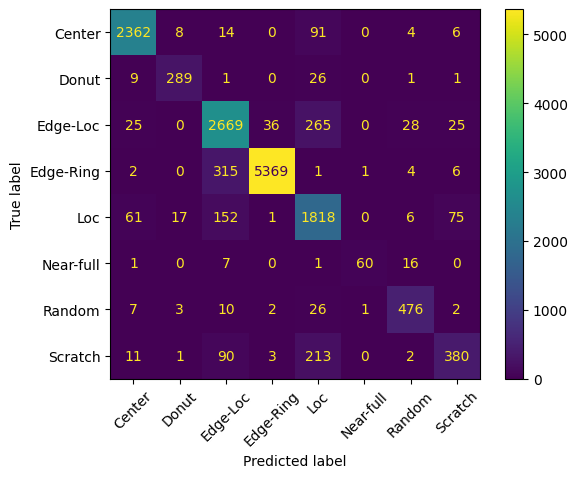

In [ ]:
################################################################################
#---------------------------Compute Confusion Matrix----------------------------
################################################################################
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cnf_matrix = confusion_matrix(actual_labels, predicted_labels)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix,\
                              display_labels= np.unique(np.array(actual_labels + predicted_labels))
                              )
disp.plot()
disp.ax_.xaxis.set_tick_params(rotation=45)

IndexError: ignored

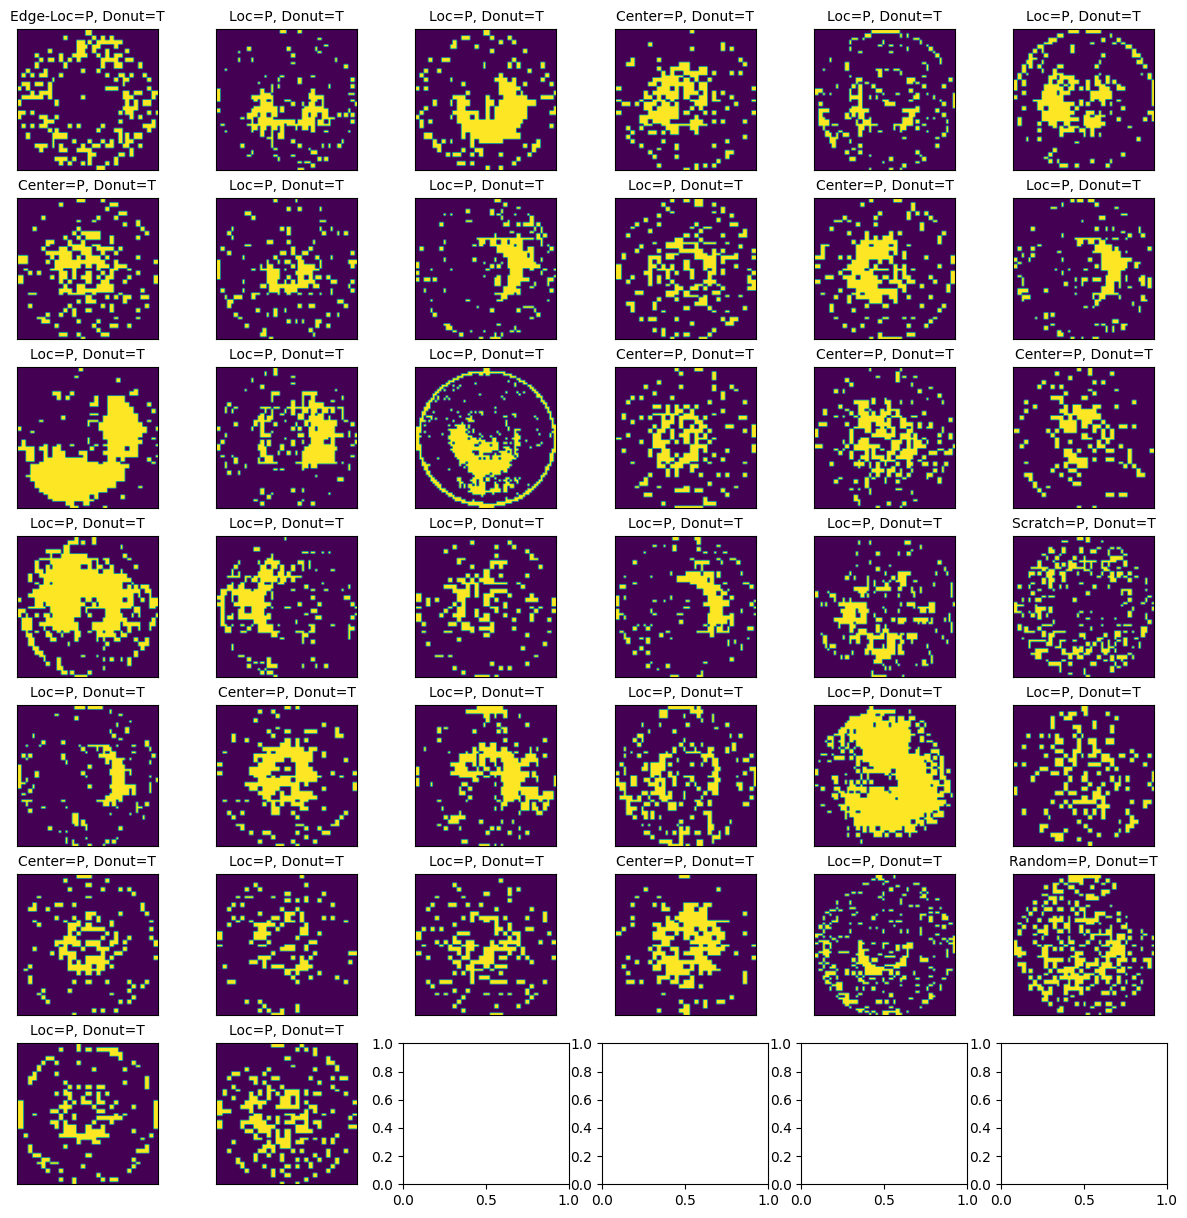

In [ ]:
################################################################################
#------------------------------Analyzing Donuts---------------------------------
################################################################################
# changing to pandas series since you want to to be able to save the index's
# and its easier this way.
true_donuts = pd.Series(actual_labels)
true_donuts = true_donuts[true_donuts == 'Donut']
# changing to pandas series since you want to to be able to save the index's
# and its easier this way.
predicted_donuts = pd.Series(predicted_labels)
predicted_donuts = predicted_donuts[true_donuts.index]
# Save incorrect images and labels
incorrect_indices = predicted_donuts.compare(true_donuts).index
incorrect_images = predict_maps[0][incorrect_indices,:,:,2]
incorrect_labels = [predicted_donuts[i] for i in incorrect_indices]
correct_labels = [true_donuts[i] for i in incorrect_indices]

# Plot wrong Donut predictions
nrows = math.ceil(incorrect_images.shape[0] / 6)
# ncols = nrows
fig, ax = plt.subplots(nrows = nrows, ncols = 6, figsize=(15,15))

ax = ax.ravel(order='C')
for i in range(ax.shape[0]):
    img = incorrect_images[i,:,:]
    ax[i].imshow(img)
    ax[i].set_title(incorrect_labels[i]+"=P, "+correct_labels[i]+"=T",fontsize=10)
    ax[i].set_xticks([])
    ax[i].set_yticks([])
plt.tight_layout()
plt.show()

In [ ]:
################################################################################
#------------------------Inspecting wrong predictions---------------------------
################################################################################
# Save incorrect images and labels
incorrect_indices = [i for i in range(len(actual_labels)) if actual_labels[i] != predicted_labels[i]]
incorrect_images = predict_maps[0][incorrect_indices,:,:,2]
incorrect_labels = [predicted_labels[i] for i in incorrect_indices]
# [incorrect_labels.append(list(encoders.keys())[key]) for key in\
#  predicted_labels[incorrect_indices]]
correct_labels = [actual_labels[i] for i in incorrect_indices]
# [correct_labels.append(list(encoders.keys())[key]) for key in \
#  np.where(predict_labels[0] ==  1)[1][incorrect_indices]]
# Plot wrong predictions
i = 0
for map in incorrect_images:
  plot_map(map,(incorrect_labels[i]+"=P",correct_labels[i]+"=T") )
  i += 1

## Other Models

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 223, 223, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 223, 223, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 111, 111, 16)      2320      
                                                                 
 batch_normalization_1 (Bat  (None, 111, 111, 16)      64        
 chNormalization)                                                
                                                        

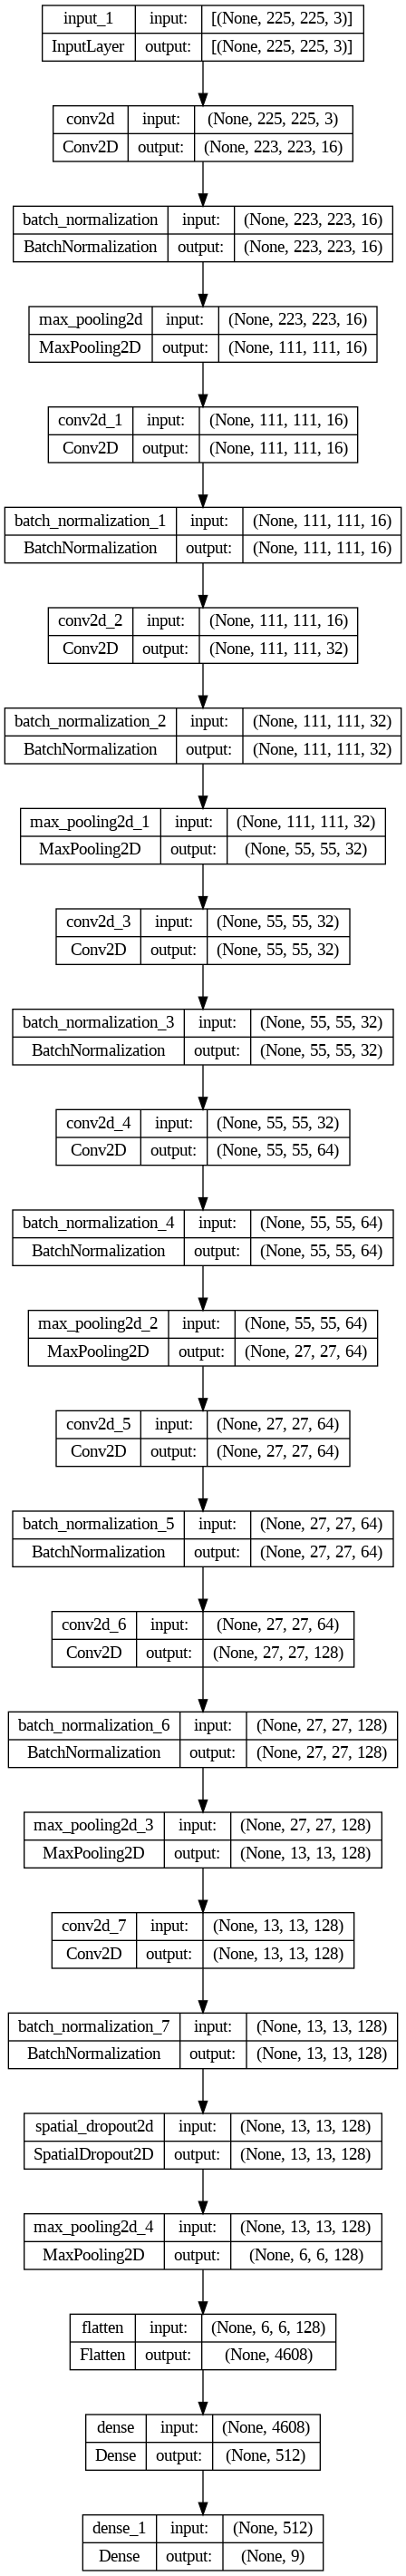

In [ ]:
################################################################################
#------------------------------Model Definition---------------------------------
################################################################################
model = Sequential([
    # Input
    Input(shape=(225, 225, 3)),

    # block 1
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'),
    # Ref.: https://arxiv.org/abs/1502.03167
    # This normalizes each batch of inputs to the next layer, it helps to reduce
    # internal covariance (variability between batches) and improves accuracy.
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 2
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 3
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 4
    Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2,2)),
    Conv2D(filters=128, kernel_size=(2,2), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),

    # block 5
    SpatialDropout2D(rate=0.2),
    MaxPool2D(pool_size=(2,2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dense(9, activation='softmax')
])
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
# Plotting model arquitecture
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
################################################################################
#------------------------------Running Model------------------------------------
################################################################################

history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=20, batch_size=100)
histories.append(history)

In [ ]:
################################################################################
#----------------------------Evaluating Model-----------------------------------
################################################################################
for history in histories:
    # accuracy plot
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # loss plot
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

# Misc Coding Notes

*   Ctrl + Shift + Enter to run a highlighted subsection of a block of code
*   Ctrl + / Commenting
*   type() checks variable type
*   axis = 0 "rows" 1 "columns"
*   Display the docstring of a function Ctrl + Shift (after running)
*   df.shape gives the x-y dim of a dataframe
* ctrl + F8: Run all cells prior to current cell

# Misc Coding Recipes

In [ ]:
# The below line increases the output width of np.array's so that you plot
# entire rows in one line and see a better depiction of a matrix.
np.set_printoptions(edgeitems=30, linewidth=100000,
    formatter=dict(float=lambda x: "%.3g" % x))
# Everything after is just getting a maps and plotting it.
map = test_df[test_df['failureType'] == 'Scratch'].loc[:,['waferMap','waferMapDim','failureType']]
map.reset_index(inplace = True, drop = True)
map = map.waferMap[0]
map[np.where(map == 1)] = 0
# print(np.stack(map))
print(map)

In [ ]:
# How to concatenate two MxN arrays into a third LxNxM array
aug_test = label_pattern[label_pattern['failureType'] == 'Donut']['waferMap']\
            .reset_index(drop = True).iloc[0]
aug_img = augment_images(aug_test)
# In order for this to work you need add a dimension to each of the input
# two dimensional arrays to make them three dimensional and then you can
# concatenate them
test = np.concatenate((aug_test[np.newaxis,:,:],aug_img[np.newaxis,:,:]),axis=0)

In [ ]:
# How to print maps as a matrix and visual them
smallest_map = df_label.iloc[172949]['waferMap']
smallest_map.shape
print(np.matrix(smallest_map))

In [ ]:
# If you have an n-dim numpy array that you would like to save into a specific
# cell of a dataframe you have you use a bracket wrapper '[]' when you assign it
# Exm#1:
clean_df.iloc[0,6] = [clean_df.iloc[1,0]]

# Exm#2: Using the return of the user defined function madppad
clean_df.iloc[0,6] = [mappad(225,225,clean_df.iloc[1,0])]

In [ ]:
!git remote set-url origin <URL> # Changes url of mask "origin"
!git remote -v # shows all the masks you currently have set

In [ ]:
# You can appyl multiple .apply() to any given series. It's execution order is from left to right
# df_temp = df['failureType'].apply(np.squeeze).apply(lambda x: x=='none')


In [ ]:
# CWD_PATH = os.getcwd()
# os.chdir('%s/..' % os.getcwd())
# print(os.getcwd())

/content


In [ ]:
# The code below reads in a pickle sequentially into an empty object which is
# ultimately a dictionary.

# objects = []
# with (open("DATA_PATH", "rb")) as openfile: # with-as is a common method used for opening files, it masks the open() function with a variable pointing to it named 'openfile'
#     while True: #infinite loop, you'll need a break at somepoint
# # try and break are part of error handling methods you can google this.
#         try:
#             objects.append(pickle.load(openfile))
#         except EOFError:
#             break

# Old Code Snippets

In [ ]:
################################################################################
###################### MapPad function to Pad Maps##############################
################################################################################
#-------------Finding the max X and Y size of any map--------------------------
# Ans: MaxX=212 ; MaxY=204
# # shape_max_X = 0
# # shape_max_Y = 0
# # for i in range(len(clean_df)):
# #   if clean_df.iloc[i,0].shape[0] > shape_max_X:
# #     shape_max_X = clean_df.iloc[i,0].shape[0]
# #   if clean_df.iloc[i,0].shape[1] > shape_max_Y:
# #     shape_max_Y = clean_df.iloc[i,0].shape[1]
# # print(shape_max_X,",",shape_max_Y)
# #------------------Function to pad maps----------------------------------------
# # It takes target X and Y dimensions and wafer map as input, then pads the wafer
# # map with 0's until it has the target dimensions, finally returning the padded
# # wafer map.
# def mappad(target_Xdim, target_Ydim, wafer_map):
#   left_pad = math.ceil((target_Xdim - wafer_map.shape[1])/2)
#   right_pad = math.floor((target_Xdim - wafer_map.shape[1])/2)
#   top_pad = math.ceil((target_Ydim - wafer_map.shape[0])/2)
#   bottom_pad = math.floor((target_Ydim - wafer_map.shape[0])/2)
#   padded_map = np.pad(wafer_map,
#                 pad_width= ((top_pad,bottom_pad),(left_pad,right_pad))
#                 )
#   # Used to check if padidng worked:
#   # display("Dimension after padding: ",padded_map.shape)
#   # fig, axs = plt.subplots(1,2)
#   # axs[0].imshow(wafer_map)
#   # axs[0].set_title("Raw Map")
#   # axs[1].imshow(padded_map)
#   # axs[1].set_title("Padded Map")
#   return padded_map

In [ ]:
################################################################################
# getting rid of 'none' and '[]' type maps and continuing the pre-processing.
################################################################################
# clean_df = clean_df.loc[(clean_df['failureType'] != 'none') & (clean_df['failureType'] != '[]')]
# clean_df.reset_index(inplace = True, drop = True)# reseting index inplace
# print(clean_df.head())
# # clean_df.groupby(['trianTestLabel','failureType']).count()
# display("Clean DF: ",clean_df[['trianTestLabel','failureType','dieSize']]\
#         .rename(columns = {'dieSize': '# of Maps'})\
#         .groupby(['trianTestLabel','failureType']).count())

In [ ]:
################################################################################
#----------------------------Prep'ing Train Data--------------------------------
################################################################################
# x_train, y_train = [], []
# class_num = 8 # Limit to only labeled fail patterns [0,1,2,3,4,5,6,7]
# dsize = (64, 64)
# temp_label = label_pattern
# # while temp_label.shape[0] > 1000:
# for i in range(30):
#   # Sampling some of data from the the labeled data only
#   train = temp_label.sample(n=500, replace=False)
#   # Concat sampled df to original df
#   temp_label = pd.concat([train, temp_label])
#   # Use index difference to remove sampled data from original df so that the
#   # next time you sample you don't sample the same data (i.e. sample w/o
#   # replacement)
#   temp_label = temp_label.loc[temp_label.index.difference(train.index),]
#   # You reset the index on the sampled df AFTER you use it to index difference
#   train.reset_index(inplace = True, drop = True)# reseting index inplace
#   # Resize maps (default is 64,64)
#   resized_maps = resize_images(train['waferMap'])
#   display("Temp Label size:", temp_label.shape[0])
#   # This Augments (i.e. distorts) images. Note that it will return np.array
#   # per definition of the function, which is what you need for CNN.
#   augmented_maps = augment_images(resized_maps)
#   del resized_maps
#   # One hot encode maps
#   encoded_maps = encode_images(augmented_maps)
#   del augmented_maps
#   # Creates an array of all zeros
#   labels = np.zeros((encoded_maps.shape[0], class_num))
#   # fills in only the column corresponding to the failNum with "1"
#   for i in range(encoded_maps.shape[0]):
#       labels[i][train['failureNum'][i]] = 1
#   # Saving to a test array. The shape is (24990,225,225,3)
#   x_train.extend(encoded_maps)
#   y_train.extend(labels)


# x_train = np.array(x_train)
# y_train = np.array(y_train)
# display("there are ",len(x_train),"maps for training")

In [ ]:
################################################################################
#----------------------------Prep'ing Test Data---------------------------------
################################################################################
# x_test, y_test = [], []
# class_num = 8 # Limit to only labeled fail patterns [0,1,2,3,4,5,6,7]
# dsize = (64, 64)
# # Sampling 2% of data from the the labeled data only (510w)
# test = label_pattern.sample(frac=0.02, replace=True, random_state=1)
# test.reset_index(inplace = True, drop = True)# reseting index inplace
# # One hot encode maps, this returns a np.array and also resizes maps.
# encoded_maps = encode_images(test['waferMap'], 64, 64)
# # Creates a 510x8 array of all zeros
# labels = np.zeros((encoded_maps.shape[0], class_num))
# # fills in only the column corresponding to the failNum with "1"
# for i in range(encoded_maps.shape[0]):
#     labels[i][test['failureNum'][i]] = 1
# del test
# x_test.extend(encoded_maps)
# y_test.extend(labels)
# x_test = np.array(x_test)
# y_test = np.array(y_test)
# display("there are ",len(x_test),"maps for testing")

In [ ]:
################################################################################
########## Padding with zeros to make all maps the same size####################
################################################################################
# # Add column of Padded maps to DF
# clean_df['Padded_Map'] = None # Add an empty column to store the padded maps
# # moving the Padded Map column after the waferMap column
# cols = clean_df.columns.tolist()
# cols = cols[0:1] + cols[-1:] + cols[1:6]
# clean_df = clean_df[cols]
# # The line below isolates the waferMap column and applies to each row (i.e.
# # each map) the function mappad which is defined above, the resulting padded map
# # is then added as a new row to the column 'Padded_Map'.
# clean_df['Padded_Map'] = clean_df['waferMap'].apply(lambda map: mappad(225,225,map))
# clean_df.head()

In [ ]:
################################################################################
#-------------------Split into Train, Validate, Test----------------------------
#-----------------Disproportionate Stratified Sampling--------------------------
################################################################################
# We choose equal number of wafer maps from each group, even though some groups
# have more maps than others. Drawback with this is that we limit the max maps
# per group to the group with least maps, in this case this is Group6 = 149,
# so our dataset goes from 25,529 to 149*8 = 1,192.
test_df = label_pattern.groupby(['failureNum'], group_keys = False).apply(lambda x: x.sample(149))
test_df.reset_index(inplace = True, drop = True)# reseting index inplace
# strata1_df.head()
display("Disproportionate Stratified DF: ",test_df[['failureNum','failureType','dieSize']]\
        .rename(columns = {'dieSize': '# of Maps'}).groupby(['failureNum','failureType']).count())
# # This just randomizes the rows fo the DF:
# strata1_df = strata1_df.sample(frac=1, random_state=1).reset_index(drop=True)
# # Defines length ot train(60%), validation(15%), and test_data (25%)
# train_length = int(0.6*len(strata1_df))
# valid_length = int(0.15*len(strata1_df))
# test_length = int(0.25*len(strata1_df))
# df_train, df_valid, df_test = strata1_df[:train_length] , strata1_df[train_length : train_length + valid_length] , strata1_df[train_length + valid_length : train_length + valid_length+test_length]
# print("\n------------------------------\nTraining Data length: ",len(df_train))
# print("Validation Data Length: ",len(df_valid),"\nTest Data Lenth: ",len(df_test),"\n------------------------------")
# display("Training DF: ",df_train[['Encoded_Labels','failureType','dieSize']].rename(columns = {'dieSize': '# of Maps'}).groupby(['Encoded_Labels','failureType']).count())
# display("Validation DF: ",df_valid[['Encoded_Labels','failureType','dieSize']].rename(columns = {'dieSize': '# of Maps'}).groupby(['Encoded_Labels','failureType']).count())
# display("Test DF: ",df_test[['Encoded_Labels','failureType','dieSize']].rename(columns = {'dieSize': '# of Maps'}).groupby(['Encoded_Labels','failureType']).count())

'Disproportionate Stratified DF: '

,,# of Maps
failureNum,failureType,
0,Center,149
1,Donut,149
2,Edge-Loc,149
3,Edge-Ring,149
4,Loc,149
5,Random,149
6,Scratch,149
7,Near-full,149


In [ ]:
label_pattern.head()

,waferMap,dieSize,lotName,waferIndex,trainTestLabel,failureType,waferMapDim,failureNum
19,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683,lot1,20.0,Training,Loc,"(45, 48)",4
36,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460,lot2,12.0,Training,Edge-Loc,"(53, 58)",2
37,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460,lot2,13.0,Training,Edge-Loc,"(53, 58)",2
38,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460,lot2,14.0,Training,Edge-Loc,"(53, 58)",2
39,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",2460,lot2,15.0,Training,Edge-Loc,"(53, 58)",2


In [ ]:
proportions = label_pattern[['failureNum','failureType','dieSize']].groupby(['failureNum','failureType']).count()/label_pattern.shape[0]
proportions['dieSize'] = proportions['dieSize'].round(2)
display("Proportions Per Group: ",proportions.rename(columns = {'dieSize': 'Proportions'}))

'Proportions Per Group: '

,,Proportions
failureNum,failureType,
0,Center,0.17
1,Donut,0.02
2,Edge-Loc,0.20
3,Edge-Ring,0.38
4,Loc,0.14
5,Random,0.03
6,Scratch,0.05
7,Near-full,0.01


In [ ]:
################################################################################
#-------------------Split into Train, Validate, Test----------------------------
#-------------------Proportionate Stratified Sampling---------------------------
################################################################################
# We choose un-equal number of wafer maps from each group,choosing the # of
# samples in the same proportion as they appear in each group.
test_df = label_pattern
proportions = test_df[['failureNum','failureType','dieSize']].groupby(['failureNum','failureType']).count()/test_df.shape[0]
proportions['dieSize'] = proportions['dieSize'].round(2)
display("Proportions Per Group: ",proportions.rename(columns = {'dieSize': 'Proportions'}))
# np.select rows from a DF based on certain conditions, here we select first the
# rows of the encoded labels (i.e. strata2_df['Encoded_Labels'].eq(0) selects all rows
# with label '0') and then fills in the rows according to the condition (i.e.
# percents.iloc[0,0] selects 0.14 and fills in all rows with label '0' with 0.14)
# This is a way of creating a percents columns that can be used to filter rows
# based on this column later on.
test_df['Proportions'] = np.select([test_df['failureNum'].eq(0),
                                    test_df['failureNum'].eq(1),
                                    test_df['failureNum'].eq(2),
                                    test_df['failureNum'].eq(3),
                                    test_df['failureNum'].eq(4),
                                    test_df['failureNum'].eq(5),
                                    test_df['failureNum'].eq(6),
                                    test_df['failureNum'].eq(7)] ,
                                     [proportions.iloc[0,0],proportions.iloc[1,0],
                                      proportions.iloc[2,0],proportions.iloc[3,0],
                                      proportions.iloc[4,0],proportions.iloc[5,0],
                                      proportions.iloc[6,0],proportions.iloc[7,0]])
# test_df[['failureNum','failureType','Proportions']]\
#           .groupby('failureNum').mean().round(2)
# Selects rows from a DF based on certain conditions from the percents column,
# here we first group by the encoded labels then sample each group based on the
# percents defined in the Proportions column (i.e. df['Proportions'].iloc[0])
test_df = test_df.groupby('failureNum', group_keys = False)\
                      .apply(lambda x: x.sample(frac = x['Proportions'].iloc[0]))
test_df.reset_index(inplace = True, drop = True)# reseting index inplace
display(test_df[['failureNum','failureType','dieSize']]
        .rename(columns ={'dieSize': '# of Maps'})
        .groupby(['failureNum','failureType'])
        .count().sort_values(by = '# of Maps',ascending = False))

'Proportions Per Group: '

,,Proportions
failureNum,failureType,
0,Center,0.17
1,Donut,0.02
2,Edge-Loc,0.20
3,Edge-Ring,0.38
4,Loc,0.14
5,Random,0.03
6,Scratch,0.05
7,Near-full,0.01


<ipython-input-74-e4a529b22a24>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['Proportions'] = np.select([test_df['failureNum'].eq(0),


,,# of Maps
failureNum,failureType,
3,Edge-Ring,3678
2,Edge-Loc,1038
0,Center,730
4,Loc,503
6,Scratch,60
5,Random,26
1,Donut,11
7,Near-full,1
